Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors
Chanin Nantasenamat

'Data Professor' YouTube channel

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors using lazypredict python library

1. Import libraries

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import numpy as np


D:\anaconda\envs\work\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


Load the data set

In [3]:
#! wget https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv
df_url = 'https://raw.githubusercontent.com/Rodhanp/Drug-Discovery/main/3_Dataset%20Preparation/output/05082021/DAT/DAT_bioactivity_data_3class_pIC50_pubchem_fp_05082021.csv'

In [4]:
df = pd.read_csv(df_url)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.43
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.39
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.33
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.14
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.77
1746,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.74
1747,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.20
1748,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.35


In [5]:
X = df.drop('pIC50', axis =1)
Y = df.pIC50

Data Preprocessing

In [6]:
#Examine X and Y dimensions
X.shape, Y.shape

((1750, 881), (1750,))

In [7]:
#Remove all features that are either one or zero in more than 80% of the samples. 
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1- .8)))
X=selection.fit_transform(X)
X.shape

(1750, 92)

In [8]:
#Splitting the data in 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Compare ML Algorithms

In [9]:
# Defines and builds the lazyclassifier


#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#clf_models,clf_predictions=clf.fit(X_train,X_test,Y_train,Y_test)


In [10]:
# Defines and builds the lazyregressor 
#from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )

train,test = reg.fit(X_train, X_test, Y_train, Y_test)


100%|██████████| 42/42 [00:18<00:00,  2.23it/s]


In [11]:

#Performance table of the training set (80% subset)
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.40,0.56,0.76,1.06
LGBMRegressor,0.40,0.56,0.76,0.23
HistGradientBoostingRegressor,0.40,0.56,0.76,4.91
XGBRegressor,0.39,0.55,0.77,1.74
BaggingRegressor,0.35,0.52,0.79,0.16
NuSVR,0.35,0.52,0.80,0.27
SVR,0.35,0.52,0.80,0.31
MLPRegressor,0.34,0.52,0.80,3.74
GradientBoostingRegressor,0.31,0.49,0.82,0.41


In [12]:
#Performance table of the test set (20% subset)
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.40,0.56,0.76,1.06
LGBMRegressor,0.40,0.56,0.76,0.23
HistGradientBoostingRegressor,0.40,0.56,0.76,4.91
XGBRegressor,0.39,0.55,0.77,1.74
BaggingRegressor,0.35,0.52,0.79,0.16
NuSVR,0.35,0.52,0.80,0.27
SVR,0.35,0.52,0.80,0.31
MLPRegressor,0.34,0.52,0.80,3.74
GradientBoostingRegressor,0.31,0.49,0.82,0.41


[(0.0, 1.0)]

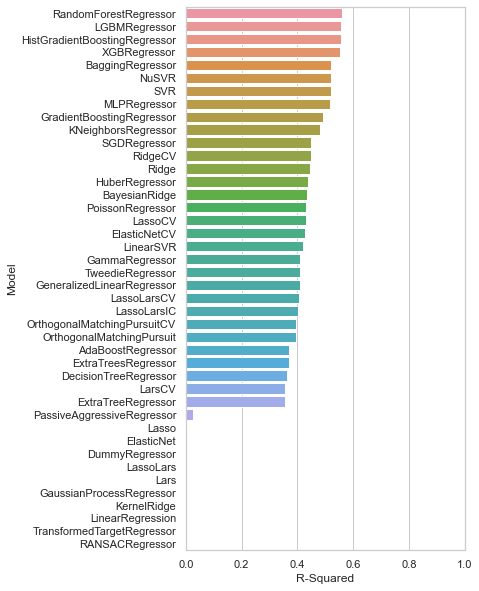

In [13]:
#train ["R-Squared"] = [0 if i<0 else i for i in train.iloc[:,0]]
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="R-Squared", data=train )
ax.set(xlim=(0,1))


[(0.0, 10.0)]

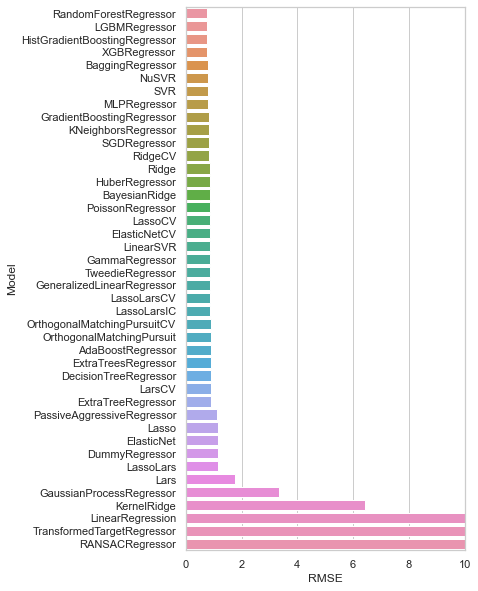

In [14]:
#Bar plot of RMSE
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="RMSE", data=train )
ax.set(xlim=(0,10))


[(0.0, 10.0)]

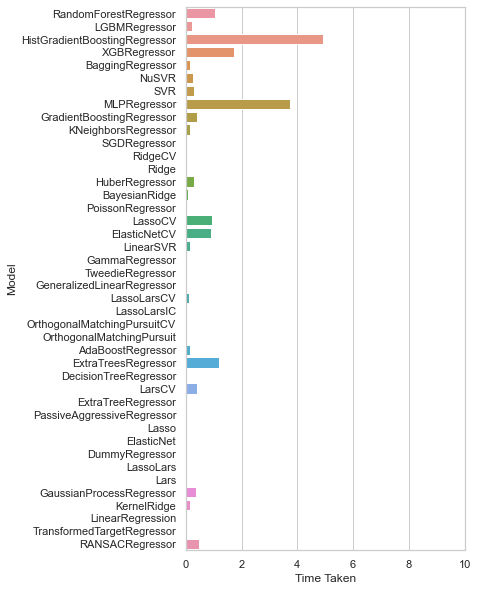

In [15]:
#Bar plot of calculation time
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=train.index, x="Time Taken", data=train )
ax.set(xlim=(0,10))
